Voamin=0.00, Voamax=120.00
0.2736: kp=0.2736
0.5472: kp=0.5472
1.2101538461538461: kp=1.2101538461538461
0.3: kp=0.3
from 400 to 500 by 3
sleep for 10 min
from 500 to 600 by 3
sleep for 10 min
from 600 to 700 by 3
sleep for 10 min
from 700 to 800 by 3
sleep for 10 min
from 800 to 900 by 3
sleep for 10 min
from 900 to 800 by 3
sleep for 10 min
from 800 to 700 by 3
sleep for 10 min
from 700 to 600 by 3
sleep for 10 min
from 600 to 500 by 3
sleep for 10 min
from 500 to 550 by 3
sleep for 10 min
from 550 to 600 by 3
sleep for 10 min
from 600 to 650 by 3
sleep for 10 min
from 650 to 700 by 3
sleep for 10 min
from 700 to 640 by 3
sleep for 100 min


<Axes: >

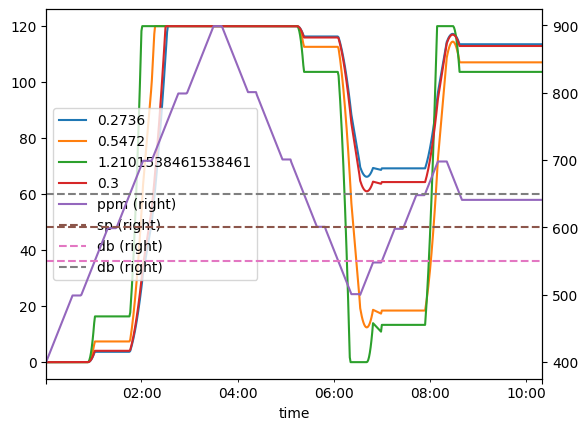

In [1]:

# import os
# import sys
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
from auto_co2 import run_test, PIController

# import matplotlib.pyplot as plt
from pandas import DataFrame, to_datetime

sp = 600
db = 50
kp = 0.076 * 3.6 / 5.2
ti = 8

pi = [ 
    (str(v), PIController(v, t, db)) 
    for v,t in [(kp*5.2,8), (kp*10.4,8), (kp*23,8), (0.3, 8)] 
    # for v, t in [(5.2, 8), (5.2, 60)] 
]

data = run_test(sp, 1, 3, pi, [
    (400, 10),
    (500, 10),
    (600, 10),
    (700, 10),
    (800, 10),
    (900, 10),
    (800, 10),
    (700, 10),
    (600, 10),
    (500, 10),
    (550, 10),
    (600, 10),
    (650, 10),
    (700, 10),
    (640, 100),
])

df = DataFrame(data)
df['time']=to_datetime(df["tm"], unit='ms')
df['sp']=sp
df['db_min']=sp-db
df['db_max']=sp+db
ax = df.plot(x="time", y=[key for key, _ in pi])
df.plot(x="time", y=["ppm","sp","db_min","db_max"], secondary_y=True, ax=ax, 
        style=['-','--','--','--'], label=["ppm","sp","db","db"])


# plt.plot(data.tm, data.ppm, "b", data.tm, data.Doa, "g")
# plt.show()
